# **Klasifikasi Bagging Decision Tree (Ecoli)**

1. Decision Tree

    * Algoritma dasar yang membagi data berdasarkan fitur tertentu sampai mencapai keputusan (kelas).

    * Sederhana, tetapi rentan overfitting kalau pohon dibuat terlalu dalam.

2. Bagging (Bootstrap Aggregating)

    * Teknik ensemble di mana kita membuat banyak subset dari data training dengan cara bootstrap sampling (sampling dengan pengembalian).

    * Setiap subset dilatih dengan model (misalnya Decision Tree).

    * Prediksi akhir ditentukan dengan voting (untuk klasifikasi) atau rata-rata (untuk regresi).

3. Bagging Decision Tree

    * Menggabungkan banyak pohon keputusan yang dilatih pada subset data berbeda.

    * Hasil akhir adalah rata-rata/majority vote dari semua pohon.

    * Lebih stabil dan akurat dibanding satu Decision Tree saja.


Kita akan melakukan klasifikasi data ecoli menggunakan metode bagging decison tree:

* data ecoli sebelum oversampling
* data ecoli sesudah oversampling (SMOTE)
* data ecoli sesudah oversampling (ADASYN)

Mencari akurasi dari setiap jenis kondisi data dan mencari akurasi tertinggi atau terbaik


## **Instalasi Library**

Install library yang akan digunakan dalam mendukung proses pemodelan

In [1]:
!pip install pandas scikit-learn matplotlib openpyxl pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sqlalchemy import create_engine
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Pengambilan Data

Data ecoli diambil dari:
https://archive.ics.uci.edu/dataset/39/ecoli

dan dilakukan dengan cara:

1. data asli yang sudah berada pada csv
2. data oversampling smote yang sudah dalam bentuk xlsx
2. data oversampling adasyn yang sudah dalam bentuk xlsx

### Pengambilan data Ecoli asli

In [4]:
from google.colab import files
import pandas as pd

# Upload file data_ecoli.xlsx
uploaded = files.upload()

# Baca file
df = pd.read_excel("data_ecoli.xlsx")
X = df.drop(columns=["class"])   # fitur
y = df["class"]

df


Saving data_ecoli.xlsx to data_ecoli.xlsx


,id,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,1,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,2,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,3,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,4,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,5,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,332,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,333,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,334,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,335,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


### Pengambilan data Ecoli Oversampling (SMOTE)

In [5]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df_smote = pd.read_excel("hasil_smote.xlsx")
x_smote = df_smote.drop(columns=["class"])
y_smote = df_smote["class"]
df_smote


Saving hasil_smote.xlsx to hasil_smote.xlsx


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,cp
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,cp
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,cp
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,cp
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,cp
...,...,...,...,...,...,...,...,...
1139,0.660161,0.679839,0.48,0.5,0.615080,0.440214,0.400054,pp
1140,0.755882,0.732574,0.48,0.5,0.439485,0.392574,0.391544,pp
1141,0.632786,0.854427,0.48,0.5,0.384427,0.464427,0.356719,pp
1142,0.734496,0.747339,0.48,0.5,0.316421,0.541008,0.523669,pp


### Pengambilan data Ecoli Oversampling (ADASYN)

In [6]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df_adasyn = pd.read_excel("hasil_adasyn.xlsx")
x_adasyn = df_adasyn.drop(columns=["class"])
y_adasyn = df_adasyn["class"]
df_adasyn


Saving hasil_adasyn.xlsx to hasil_adasyn.xlsx


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,cp
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,cp
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,cp
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,cp
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,cp
...,...,...,...,...,...,...,...,...
1146,0.406464,0.508027,0.48,0.5,0.488118,0.670000,0.396282,im
1147,0.359502,0.539751,0.48,0.5,0.397687,0.665783,0.299092,im
1148,0.628443,0.534551,0.48,0.5,0.599400,0.790778,0.771856,im
1149,0.584697,0.617865,0.48,0.5,0.613573,0.688472,0.663775,im


## **Klasifikasi tanpa Oversampling**

Klasifikasi pada data ecoli sebelum melalui proses oversampling

Akurasi: 0.9705882352941176
Classification Report:
               precision    recall  f1-score   support

          cp       1.00      1.00      1.00        32
          im       0.93      1.00      0.96        13
         imL       0.00      0.00      0.00         0
         imS       0.00      0.00      0.00         1
         imU       1.00      0.75      0.86         4
          om       1.00      1.00      1.00         6
         omL       1.00      1.00      1.00         1
          pp       1.00      1.00      1.00        11

    accuracy                           0.97        68
   macro avg       0.74      0.72      0.73        68
weighted avg       0.97      0.97      0.97        68



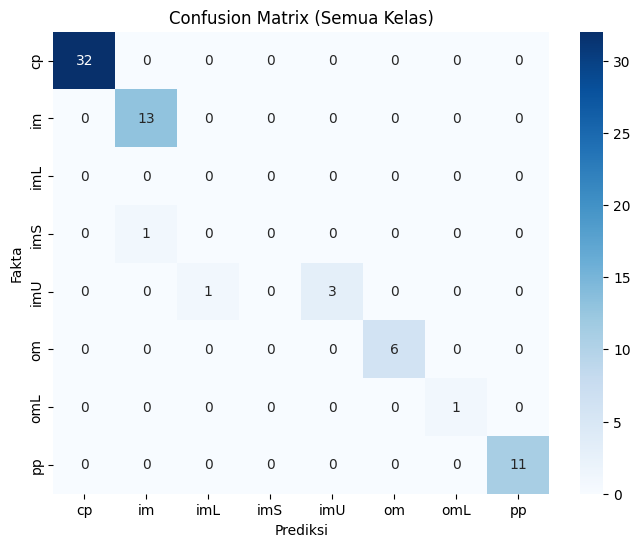

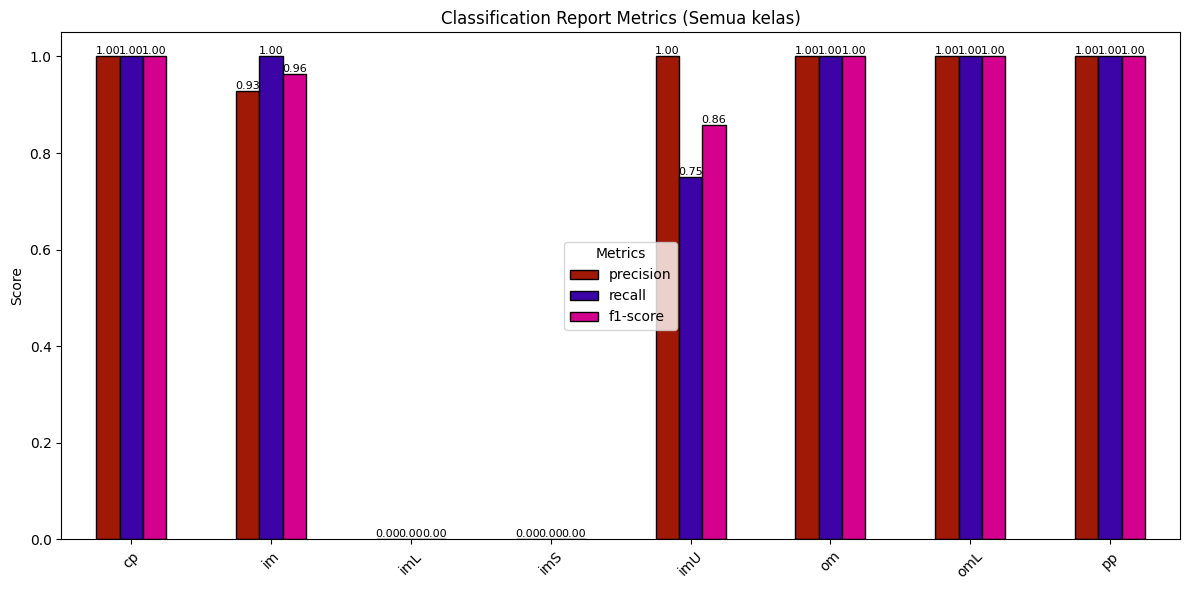

In [7]:
X = df.drop(columns=["class"])
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier()

bagging = BaggingClassifier(estimator=model, n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

prediksi = bagging.predict(X_test)
akurasi = accuracy_score(y_test, prediksi)
print("Akurasi:", akurasi)
print("Classification Report:\n", classification_report(y_test, prediksi, zero_division=0))

# confuison matrix

labels = np.unique(np.concatenate([y_train, y_test]))

cm = confusion_matrix(y_test, prediksi, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train, y_test]))

report = classification_report(
    y_test, prediksi, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## **Klasifikasi Data Oversampling (SMOTE)**

Klasifikasi pada data ecoli sesudah melalui proses oversampling menggunakan SMOTE

Akurasi :  0.9650655021834061
Classification Report:
               precision    recall  f1-score   support

          cp       0.94      1.00      0.97        32
          im       1.00      0.82      0.90        28
         imL       1.00      1.00      1.00        29
         imS       1.00      1.00      1.00        31
         imU       0.84      1.00      0.92        27
          om       1.00      0.97      0.98        29
         omL       0.95      1.00      0.97        19
          pp       1.00      0.94      0.97        34

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.96       229
weighted avg       0.97      0.97      0.96       229



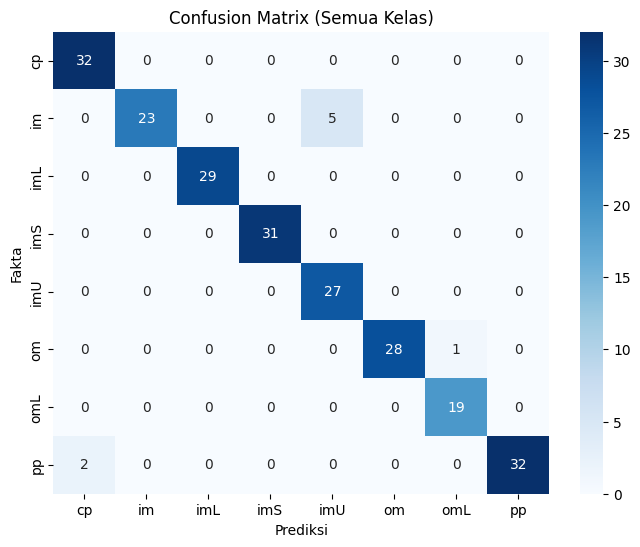

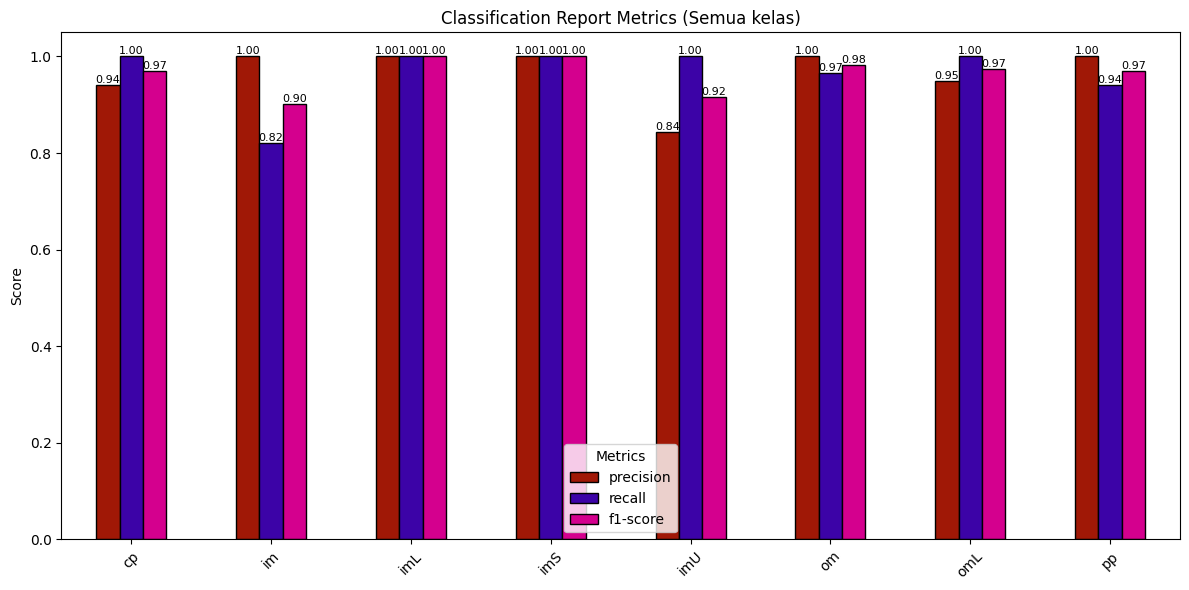

In [8]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    x_smote, y_smote, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier()
bagging = BaggingClassifier(estimator=model, n_estimators=100, random_state=42)

bagging.fit(X_train_smote, y_train_smote)

prediksi_smote = bagging.predict(X_test_smote)

akurasi_smote = accuracy_score(y_test_smote, prediksi_smote)
print("Akurasi : ", akurasi_smote)
print("Classification Report:\n", classification_report(y_test_smote, prediksi_smote, zero_division=0))


# confuison matrix
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))

cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))

report = classification_report(
    y_test_smote, prediksi_smote, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## **Klasifikasi Data Oversampling (ADASYN)**

Klasifikasi pada data ecoli sesudah melalui proses oversampling menggunakan ADASYN

accuracy_score : 0.935064935064935
Classification Report:
               precision    recall  f1-score   support

          cp       0.97      0.94      0.95        31
          im       0.85      0.79      0.81        28
         imL       1.00      1.00      1.00        27
         imS       0.97      1.00      0.98        29
         imU       0.84      0.84      0.84        31
          om       0.97      0.94      0.96        36
         omL       0.95      1.00      0.98        21
          pp       0.93      1.00      0.97        28

    accuracy                           0.94       231
   macro avg       0.93      0.94      0.94       231
weighted avg       0.93      0.94      0.93       231



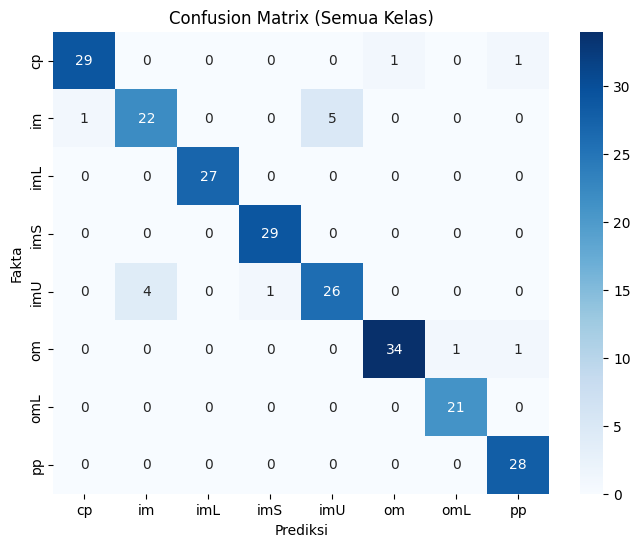

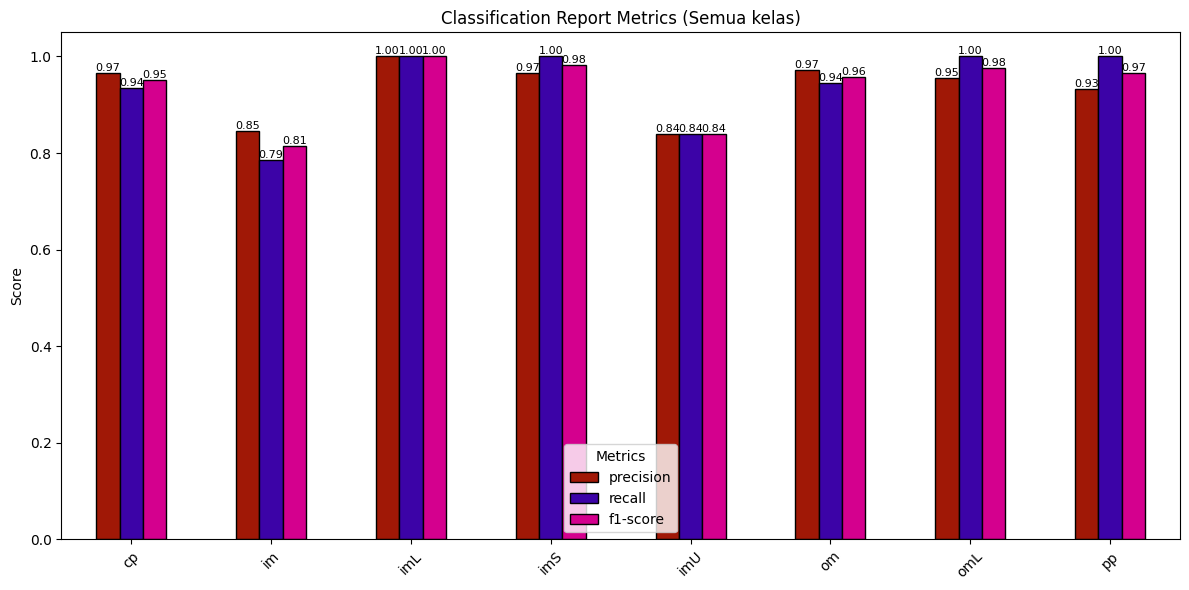

In [9]:
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    x_adasyn, y_adasyn, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier()

bagging = BaggingClassifier(estimator=model, n_estimators=100, random_state=42)

bagging.fit(X_train_adasyn, y_train_adasyn)

prediksi_adasyn = bagging.predict(X_test_adasyn)

akurasi_adasyn = accuracy_score(y_test_adasyn, prediksi_adasyn)
print(f"accuracy_score : {akurasi_adasyn}")
print("Classification Report:\n", classification_report(y_test_adasyn, prediksi_adasyn))

# confuison matrix

labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))

cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))

report = classification_report(
    y_test_adasyn, prediksi_adasyn, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"], # biru, oranye, hijau
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## **Perbandingan Akurasi**

Membandingkan akurasi data ecoli:

1. Data Asli
2. Data Oversampling SMOTE
2. Data Oversampling ADASYN



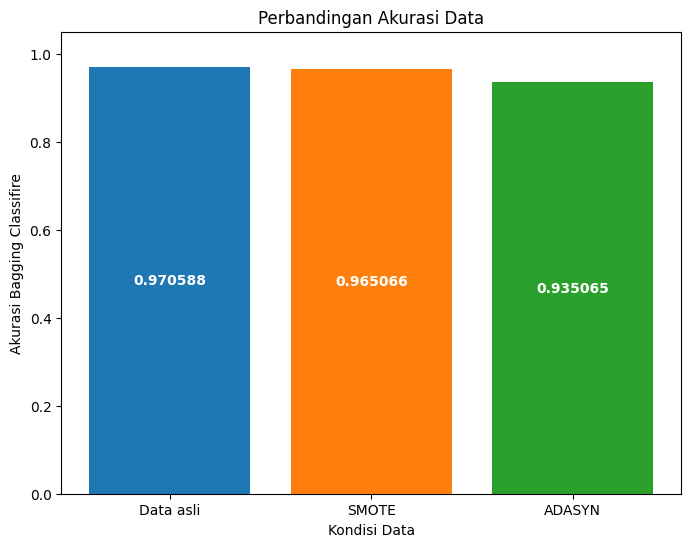

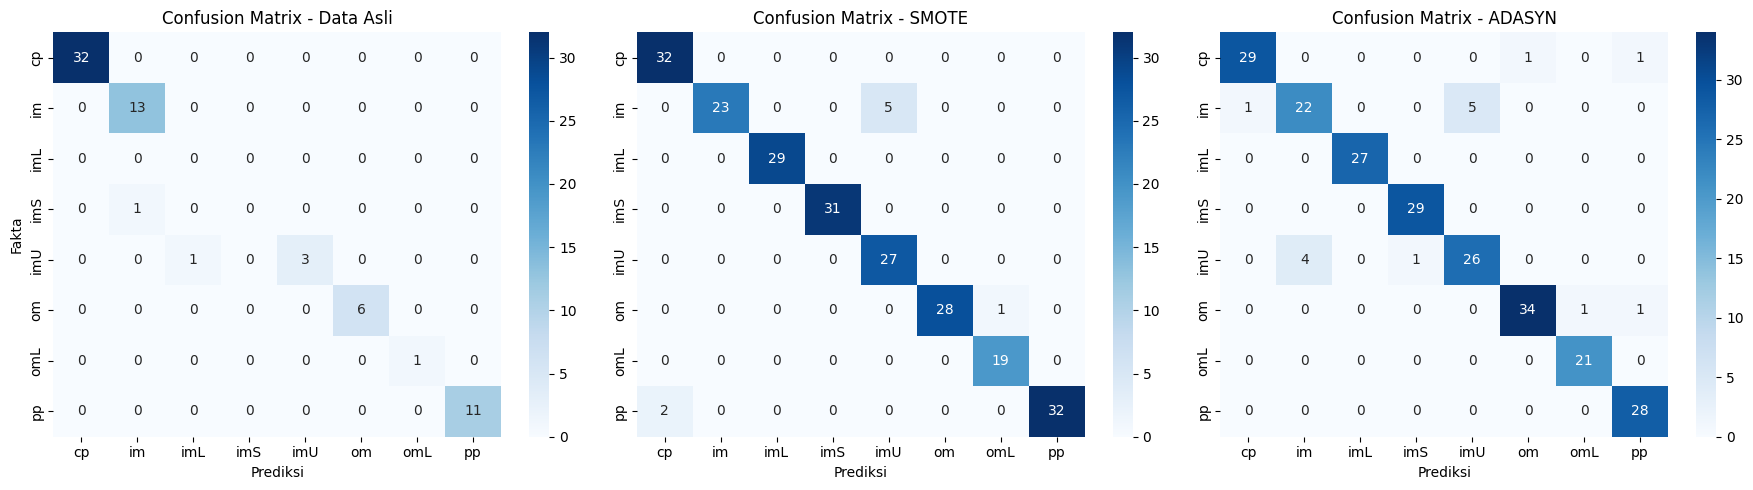

In [10]:
label = ['Data asli', 'SMOTE', 'ADASYN']
temp = [akurasi, akurasi_smote, akurasi_adasyn]

fig, ax = plt.subplots(figsize=(8,6))

bc = ax.bar(label, temp, color=['#1f77b4','#ff7f0e','#2ca02c'])

ax.bar_label(bc, label_type='center', color='w', fontweight='bold')

ax.set(
    xlabel='Kondisi Data',
    ylabel='Akurasi Bagging Classifire',
    title='Perbandingan Akurasi Data'
)

ax.set_ylim(0, 1.05)

plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Data asli
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - Data Asli")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Fakta")

# Data SMOTE
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))
cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - SMOTE")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("")

# Data ADASYN
labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title("Confusion Matrix - ADASYN")
axes[2].set_xlabel("Prediksi")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

## **Kesimpulan**

1. Perbandingan Akurasi

    * Akurasi tertinggi diperoleh pada data asli sebesar 97,06%.

    * Data hasil SMOTE memberikan akurasi yang hampir sama, yaitu 96,51%.

    * Sedangkan hasil ADASYN sedikit lebih rendah dengan akurasi 93,51%.

    * Secara umum, Bagging Decision Tree bekerja sangat baik pada data asli, sementara teknik oversampling (SMOTE dan ADASYN) tidak memberikan peningkatan, bahkan sedikit menurunkan akurasi.

2. Confusion Matrix – Data Asli

    * Model dapat mengenali hampir semua kelas dengan benar, terutama kelas mayoritas (cp, im, imL).

    * Hanya terdapat sedikit kesalahan prediksi pada kelas minoritas seperti imu dan om, namun secara keseluruhan performanya sangat baik.

3. Confusion Matrix – SMOTE

    * Setelah dilakukan SMOTE, model mampu mengenali kelas minoritas lebih baik, misalnya imu dan om semakin terklasifikasi dengan benar.

    * Akan tetapi, beberapa kesalahan prediksi muncul pada kelas im dan imS, sehingga menurunkan akurasi dibanding data asli.

4. Confusion Matrix – ADASYN

    * Pada data ADASYN, terdapat peningkatan dalam mendeteksi kelas om (banyak yang terklasifikasi dengan benar).

    * Namun, distribusi prediksi untuk kelas lain (seperti imu dan cp) menjadi kurang stabil, sehingga menyebabkan penurunan akurasi lebih signifikan dibanding data asli dan SMOTE.

5. Kesimpulan Umum

    * Bagging Decision Tree menunjukkan performa terbaik pada data asli, dengan akurasi mendekati 100%.

    * Teknik oversampling SMOTE dan ADASYN tidak meningkatkan performa, bahkan cenderung menurunkan akurasi karena memunculkan variasi data sintetis yang membuat model sedikit lebih sulit membedakan antar kelas.

    * Oleh karena itu, untuk kasus ini, data asli lebih optimal digunakan dengan Bagging Decision Tree dibandingkan dengan data hasil SMOTE atau ADASYN.